In [ ]:
!pip install tensorflow

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from numpy import dot
from numpy.linalg import norm
import os
import shutil
import time
from tqdm.auto import tqdm



In [46]:
from tqdm.auto import tqdm
import time

# Example loop
for i in tqdm(range(0,10),leave=False):
    # Simulate some work
    time.sleep(0.5)
    # print('h')
   


 10%|█         | 1/10 [00:00<00:04,  1.98it/s]

h


 20%|██        | 2/10 [00:01<00:04,  1.98it/s]

h


 30%|███       | 3/10 [00:01<00:03,  1.98it/s]

h


 40%|████      | 4/10 [00:02<00:03,  1.98it/s]

h


 50%|█████     | 5/10 [00:02<00:02,  1.98it/s]

h


 60%|██████    | 6/10 [00:03<00:02,  1.98it/s]

h


 70%|███████   | 7/10 [00:03<00:01,  1.98it/s]

h


 80%|████████  | 8/10 [00:04<00:01,  1.97it/s]

h


 90%|█████████ | 9/10 [00:04<00:00,  1.97it/s]

h


h


In [22]:
class FeatureExtractor:
  def __init__(self):
    # Use VGG-16 as the architecture and ImageNet for the weight
    base_model = VGG16(weights='imagenet')
    # Customize the model to return features from fully-connected layer
    self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

  def extract(self, img):
  # Resize the image
    img = img.resize((224, 224))

    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # Extract Features
    feature = self.model.predict(x)[0]
    return feature

In [23]:
tot_image_path = r"merged_tot_image"
file_list = os.listdir(tot_image_path)
len(file_list)

39164

In [24]:
tot_feature_path = "merged_features"

In [ ]:
features = []
img_paths = []

fe = FeatureExtractor()
# Save Image Feature Vector with Database Images

for i in tqdm(range(1609, 10000)):
  try:
    image_path = tot_image_path + '/{}'.format(file_list[i]) # 파일 속 이미지 파일 이름
    img_paths.append(image_path)

    # Extract Features
    feature = fe.extract(img=Image.open(image_path))

    features.append(feature)
    # Save the Numpy array (.npy) on designated path
    feature_path = tot_feature_path +"/" + file_list[i].strip('.jpg') + ".npy"     # Feature를 저장할 폴더 경로
    np.save(feature_path, feature)
  except Exception as e:
    print('예외가 발생했습니다.', e)

1/1 [==============================] - 2s 2s/step


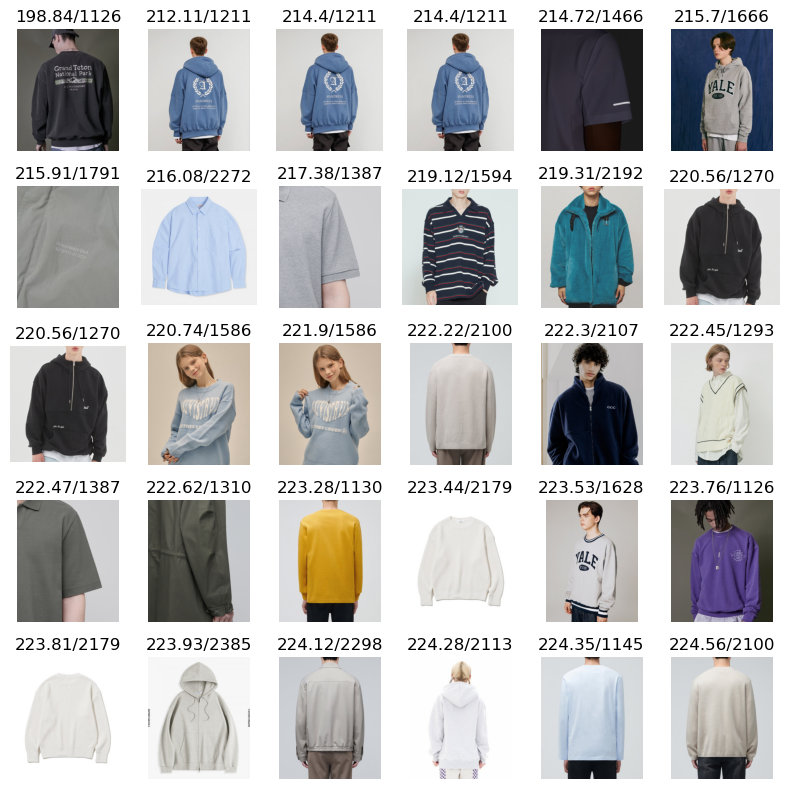

In [ ]:
# Insert the image query
img = Image.open("2928418_36357327_0.jpg") # 알고 싶은 이미지 경로
# Extract its features
query = fe.extract(img)
# Calculate the similarity (distance) between images # 유사도 비교
dists = np.linalg.norm(features - query, axis = 1)

# Extract 30 images that have lowest distance # 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]

scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 489ms/step


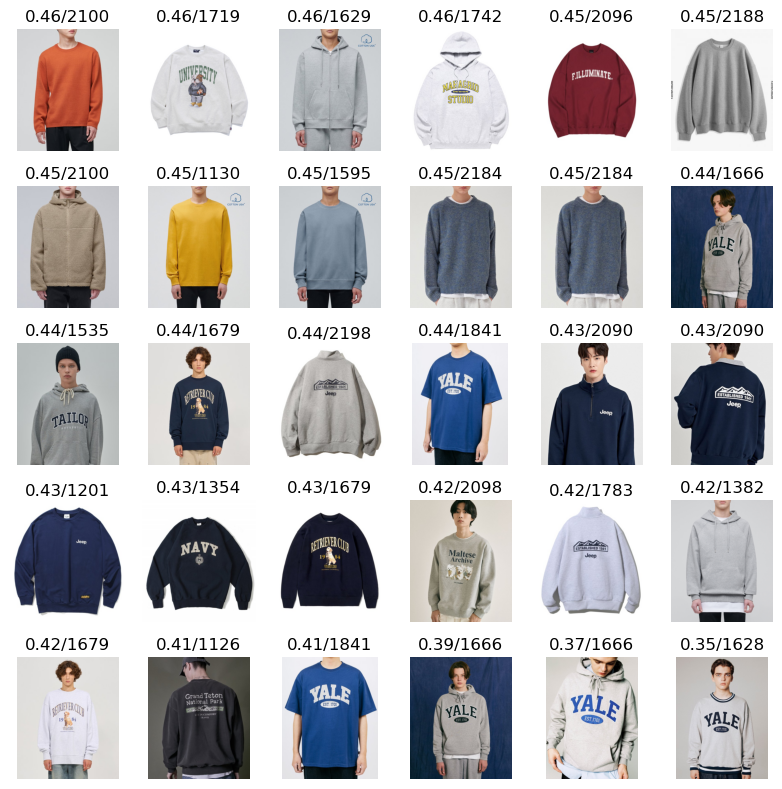

In [ ]:
# Insert the image query
img = Image.open("2928418_36357327_0.jpg") # 알고 싶은 이미지 경로
# Extract its features
query = fe.extract(img)

# Calculate the cosine similarity between images
sims = np.dot(features, query) / (np.linalg.norm(features, axis=1) * np.linalg.norm(query))

# Convert similarity scores to distance
dists = 1 - sims

# from sklearn.metrics.pairwise import cosine_similarity

# # Calculate the cosine similarity between images
# sims = cosine_similarity(features, query.reshape(1, -1))

# # Convert similarity scores to distance
# dists = 1 - sims.flatten()

# Extract 30 images that have lowest distance # 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30][::-1]

scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


In [ ]:
scores

[(0.45760328, 'merged_tot_image/2100420_0.jpg', 3903),
 (0.4574108, 'merged_tot_image/1719235_1.jpg', 6280),
 (0.455611, 'merged_tot_image/1629074_0.jpg', 136),
 (0.45549673, 'merged_tot_image/1742319_0.jpg', 6094),
 (0.4540152, 'merged_tot_image/2096929_1.jpg', 828),
 (0.45336884, 'merged_tot_image/2188843_15.jpg', 2722),
 (0.45240873, 'merged_tot_image/2100465_2.jpg', 7102),
 (0.45204598, 'merged_tot_image/1130044_0.jpg', 7648),
 (0.4486636, 'merged_tot_image/1595690_0.jpg', 85),
 (0.44784015, 'merged_tot_image/2184395_0.jpg', 6643),
 (0.44784015, 'merged_tot_image/2184395_1.jpg', 6829),
 (0.4444849, 'merged_tot_image/1666085_15.jpg', 1673),
 (0.4431349, 'merged_tot_image/1535843_1.jpg', 3933),
 (0.4423781, 'merged_tot_image/1679943_1.jpg', 5190),
 (0.43910164, 'merged_tot_image/2198089_2.jpg', 4569),
 (0.43861753, 'merged_tot_image/1841758_6.jpg', 180),
 (0.43469012, 'merged_tot_image/2090950_4.jpg', 1225),
 (0.43270886, 'merged_tot_image/2090950_5.jpg', 2598),
 (0.4318608, 'merged_

In [ ]:
plt.imshow(Image.open(img))

In [ ]:
# import numpy as np

# def extract_color_histogram(image):
#     # Convert image to RGB if it's in a different format
#     image = image.convert("RGB")
    
#     # Extract color histogram features
#     histogram = np.array(image.histogram())
    
#     return histogram


In [ ]:
# his = extract_color_histogram(img)

In [ ]:
# import matplotlib.pyplot as plt

# def display_color_palette(palette):
#     # Create a new figure
#     fig, ax = plt.subplots(figsize=(6, 1))
    
#     # Disable axis
#     ax.axis('off')
    
#     # Display the color palette as a horizontal bar
#     ax.imshow([palette], aspect='auto')
    
#     # Show the plot
#     plt.show()


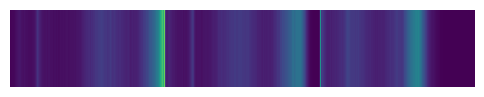

In [ ]:
# display_color_palette(his)

In [68]:
from sklearn.cluster import KMeans

def extract_main_colors(image, num_colors):
    # Convert image to RGB if it's in a different format
    image = image.convert("RGB")
    
    # Flatten image pixels
    pixels = np.array(image).reshape(-1, 3)
    
    # Perform color clustering with K-means
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    
    # Get the cluster centers as the main colors
    main_colors = kmeans.cluster_centers_
    
    return main_colors.astype(int)

def display_main_colors(main_colors):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(6, 1))
    
    # Disable axis
    ax.axis('off')
    
    # Display the main colors as a horizontal bar
    ax.imshow([main_colors], aspect='auto')
    
    # Show the plot
    plt.show()


In [106]:
img = Image.open("croppedImage.PNG") # 알고 싶은 이미지 경로


/Users/jiwonkwun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


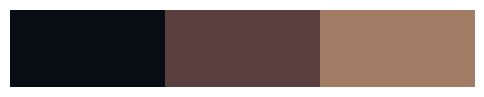

In [107]:
# Assuming 'image' is the input image
num_colors = 3  # Define the desired number of main colors
main_colors = extract_main_colors(img, num_colors)
display_main_colors(main_colors)


In [27]:
img2 = Image.open('Screen Shot 2023-06-18 at 8.30.12 PM.png')

In [37]:
from sklearn.cluster import KMeans

def color(img):
    # Resize the image
    img = img.resize((224, 224))

    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Perform color clustering with K-means
    pixels = x.reshape(-1, 3)
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(pixels)

    # Get the cluster centers as the main colors
    main_color = kmeans.cluster_centers_.flatten()


    return main_color


# 저장된 feature 불러오기

In [ ]:
path = '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/features'
output = os.listdir(path)
output

In [ ]:
features = []
paths = []
for file in output:
  feature = np.load(path + '/'+ file)
  features.append(feature)
  image = '/content/drive/MyDrive/T아카데미-데이터분석과정/DL_PROJECT/fail'+'/'+file.split('.')[0] + '.jpg'
  paths.append(image)

# 이미지 파일 경로 저장

In [3]:
path = 'merged_features'
output = os.listdir(path)
output

['1832182_3.npy',
 '1310647_3.npy',
 '1950964_2.npy',
 '2116426_7.npy',
 '1609339_2.npy',
 '1736033_4.npy',
 '1593002_6.npy',
 '2100443_4.npy',
 '2159538_0.npy',
 '2220665_7.npy',
 '2246467_2.npy',
 '1849887_3.npy',
 '2091547_6.npy',
 '1145013_1.npy',
 '2124211_6.npy',
 '1803584_5.npy',
 '1323974_5.npy',
 '1811199_4.npy',
 '1357728_1.npy',
 '2310312_1.npy',
 '2063135_2.npy',
 '1552029_8.npy',
 '1239755_7.npy',
 '1382658_4.npy',
 '1768625_1.npy',
 '1892143_4.npy',
 '1563622_6.npy',
 '2100517_9.npy',
 '2043162_3.npy',
 '1539674_0.npy',
 '1466037_1.npy',
 '1825899_10.npy',
 '1626535_0.npy',
 '2105362_3.npy',
 '1139426_2.npy',
 '2156363_3.npy',
 '1851699_0.npy',
 '226358_7.npy',
 '2116445_4.npy',
 '1791872_4.npy',
 '2208665_0.npy',
 '1567125_2.npy',
 '1288653_0.npy',
 '2086695_10.npy',
 '2155076_0.npy',
 '2279288_4.npy',
 '1114858_7.npy',
 '1832530_0.npy',
 '2279194_1.npy',
 '1317598_1.npy',
 '2080836_10.npy',
 '2289365_1.npy',
 '2189030_7.npy',
 '2099758_8.npy',
 '1791874_16.npy',
 '13444

In [41]:

database_image_paths = []
for file in output:
  image = 'merged_tot_image'+'/'+file.split('.')[0] + '.jpg'
  database_image_paths.append(image)

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.vgg16 import VGG16, preprocess_input
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False)

# Define a function to extract VGG16 features
def extract_vgg16_features(img):
    img = img.resize((224, 224))
    img = img.convert('RGB')
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    features = vgg16.predict(x)
    features = features.flatten()  # Flatten the features
    return features

# # Define a function to extract color features
# def extract_color_features(img, num_colors=3):
#     # Resize the image if needed
#     img = img.resize((224, 224))
    
#     # Convert the image to a numpy array
#     img_array = np.array(img)

#     print("img_array shape:", img_array.shape)

#     # Reshape the image array to a 2D array
#     img_array_2d = img_array.reshape(-1, 3)
    
#     print("img_array_2d shape:", img_array_2d.shape)
    
#     # Perform k-means clustering to extract dominant colors
#     kmeans = KMeans(n_clusters=num_colors)
#     kmeans.fit(img_array_2d)
    
#     # Get the RGB values of the cluster centers (dominant colors)
#     colors = kmeans.cluster_centers_

#     # Convert the colors to uint8 data type
#     colors = colors.astype(np.uint8)
    
#     # Reshape the color features to match the number of elements in VGG16 features
#     reshaped_colors = colors.reshape(-1)
    
#     # Return the dominant colors
#     return reshaped_colors
def extract_color_features(img, num_colors=3, target_size=(25088,)):
    # Resize the image if needed
    img = img.resize((224, 224))
    
    # Convert the image to RGB
    img = img.convert('RGB')
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Reshape the image array to a 3D array
    img_array_3d = img_array.reshape(img_array.shape[0], img_array.shape[1], 3)
    print("Before reshaping: img_array_3d shape:", img_array_3d.shape)
    print("Before reshaping: img_array_3d size:", img_array_3d.size)

    # Perform k-means clustering to extract dominant colors
    kmeans = KMeans(n_clusters=num_colors, n_init=10)
    kmeans.fit(img_array_3d.reshape(-1, 3))
    
    # Get the RGB values of the cluster centers (dominant colors)
    colors = kmeans.cluster_centers_
    
    # Convert the colors to uint8 data type
    colors = colors.astype(np.uint8)
    
    # Resize the color features to match the size of the VGG16 features
    resized_colors = np.resize(colors, target_size)
    
    # Return the dominant colors
    return resized_colors.flatten()






In [ ]:
# Load and preprocess the query image
query_image = Image.open("2928418_36357327_0.jpg")
query_vgg16_features = extract_vgg16_features(query_image)
query_color_features = extract_color_features(query_image, num_colors=3)

In [67]:
# Calculate cosine similarity between query features and database features
cosine_similarities = []
for image_path in database_image_paths:
    image = Image.open(image_path)
    print(image_path)
    vgg16_features = extract_vgg16_features(image)
    color_features = extract_color_features(image, num_colors=3)

    # Concatenate VGG16 features and color features
    query_features = np.concatenate((query_vgg16_features, query_color_features))
    image_features = np.concatenate((vgg16_features[:25097], color_features))

    # Print the shapes of query and image features
    print("Query features shape:", query_features.shape)
    print("Image features shape:", image_features.shape)

    # Normalize features
    query_features_norm = query_features / np.linalg.norm(query_features)
    image_features_norm = image_features / np.linalg.norm(image_features)

    # Calculate cosine similarity
    similarity = cosine_similarity(query_features_norm.reshape(1, -1), image_features_norm.reshape(1, -1))[0][0]
    cosine_similarities.append((similarity, image_path))

# Sort the images based on similarity
cosine_similarities.sort(reverse=True)

# Print the top matching images
for similarity, image_path in cosine_similarities[:30]:
    print(f"Similarity: {similarity}, Image Path: {image_path}")


merged_tot_image/1832182_3.jpg
1/1 [==============================] - 0s 169ms/step
Before reshaping: img_array_3d shape: (224, 224, 3)
Before reshaping: img_array_3d size: 150528
Query features shape: (50176,)
Image features shape: (50176,)
merged_tot_image/1310647_3.jpg
1/1 [==============================] - 0s 161ms/step
Before reshaping: img_array_3d shape: (224, 224, 3)
Before reshaping: img_array_3d size: 150528
Query features shape: (50176,)
Image features shape: (50176,)
merged_tot_image/1950964_2.jpg
1/1 [==============================] - 0s 174ms/step
Before reshaping: img_array_3d shape: (224, 224, 3)
Before reshaping: img_array_3d size: 150528
Query features shape: (50176,)
Image features shape: (50176,)
merged_tot_image/2116426_7.jpg
1/1 [==============================] - 0s 250ms/step
Before reshaping: img_array_3d shape: (224, 224, 3)
Before reshaping: img_array_3d size: 150528
Query features shape: (50176,)
Image features shape: (50176,)
merged_tot_image/1609339_2.jpg
1

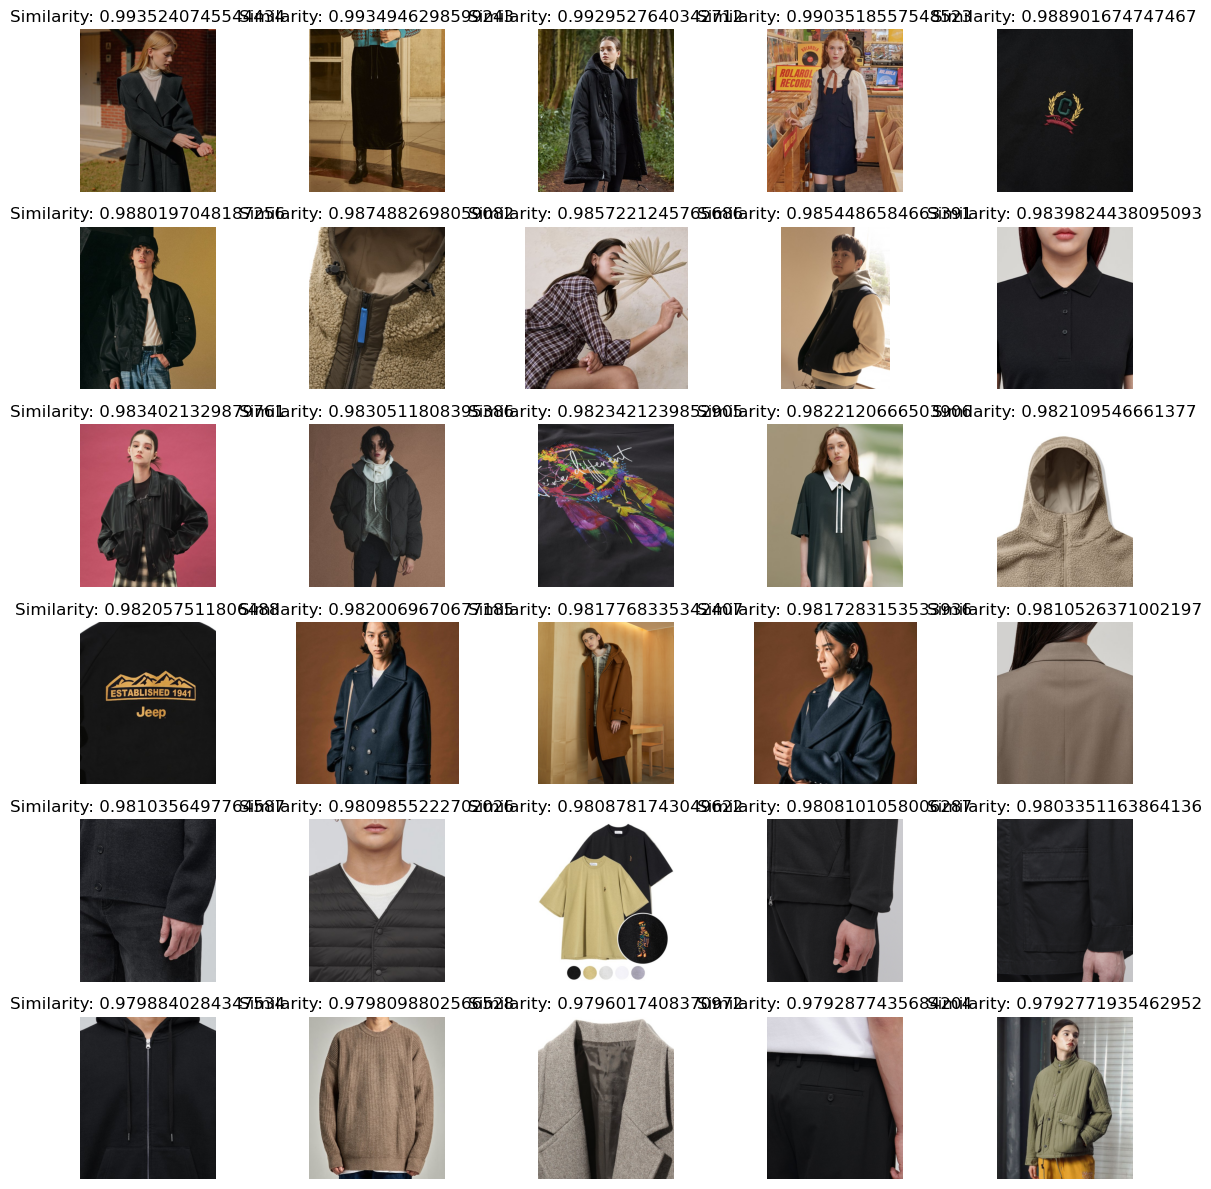

In [70]:
import matplotlib.pyplot as plt
from PIL import Image

# ...

# Similar images to display
similar_images = cosine_similarities[:30]

# Create a 6 by 5 subplot grid
fig, axs = plt.subplots(6, 5, figsize=(12, 12))

# Iterate over the similar images and display them
for i, (similarity, image_path) in enumerate(similar_images):
    # Load the image
    image = Image.open(image_path)

    # Calculate the subplot position
    row = i // 5
    col = i % 5

    # Display the image in the corresponding subplot
    axs[row, col].imshow(image)
    axs[row, col].set_title(f"Similarity: {similarity}")
    axs[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Load and preprocess the query image
query_image = Image.open("2928418_36357327_0.jpg")
query_vgg16_features = extract_vgg16_features(query_image)
query_color_features = extract_color_features(query_image, num_colors=3)

In [105]:
from PIL import Image
 
image1 = Image.open('655610_34484106_0.jpg')
image1.show()
 
#이미지의 크기 출력
print(image1.size)
 
# 이미지 자르기 crop함수 이용 ex. crop(left,up, rigth, down)
croppedImage=image1.crop((100,0,450,300))
 
croppedImage.show()
 
print("잘려진 사진 크기 :",croppedImage.size)
 
croppedImage.save('croppedImage.PNG')

(600, 875)
잘려진 사진 크기 : (350, 300)
